## **Based on the project idea, and other aspects of the startup,This system will tell you if you'll get funded or not.** 

In [ ]:
import numpy as np
import pandas as pd 
import datetime
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = pd.read_csv('train.csv', engine='python', encoding='utf-8', error_bad_lines=False, sep=',')

In [ ]:
train2 = pd.read_csv('train.csv', engine='python', encoding='utf-8', error_bad_lines=False, sep=',')

In [ ]:
train.head()

,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,backers_count,final_status
0,kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them...,20.0,drawing-for-dollars,False,US,USD,1241333999,1241334017,1240600507,1240602723,3,1
1,kkst1474482071,Sponsor Dereck Blackburn (Lostwars) Artist in ...,"I, Dereck Blackburn will be taking upon an inc...",300.0,sponsor-dereck-blackburn-lostwars-artist-in-re...,False,US,USD,1242429000,1242432018,1240960224,1240975592,2,0
2,kkst183622197,Mr. Squiggles,So I saw darkpony's successfully funded drawin...,30.0,mr-squiggles,False,US,USD,1243027560,1243027818,1242163613,1242164398,0,0
3,kkst597742710,Help me write my second novel.,Do your part to help out starving artists and ...,500.0,help-me-write-my-second-novel,False,US,USD,1243555740,1243556121,1240963795,1240966730,18,1
4,kkst1913131122,Support casting my sculpture in bronze,"I'm nearing completion on a sculpture, current...",2000.0,support-casting-my-sculpture-in-bronze,False,US,USD,1243769880,1243770317,1241177914,1241180541,1,0


In [ ]:
train.shape

(108129, 14)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108129 entries, 0 to 108128
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   project_id             108129 non-null  object 
 1   name                   108126 non-null  object 
 2   desc                   108120 non-null  object 
 3   goal                   108129 non-null  float64
 4   keywords               108129 non-null  object 
 5   disable_communication  108129 non-null  bool   
 6   country                108129 non-null  object 
 7   currency               108129 non-null  object 
 8   deadline               108129 non-null  int64  
 9   state_changed_at       108129 non-null  int64  
 10  created_at             108129 non-null  int64  
 11  launched_at            108129 non-null  int64  
 12  backers_count          108129 non-null  int64  
 13  final_status           108129 non-null  int64  
dtypes: bool(1), float64(1), int64(6), ob

In [ ]:
train=train.dropna()

In [ ]:
train['keywords'][1]

'sponsor-dereck-blackburn-lostwars-artist-in-residence-in-kankakee-illinois'

In [ ]:
timestamp =124542124
value = datetime.datetime.fromtimestamp(timestamp)
exct_time = value.strftime('%d %B %Y')
exct_time=datetime.datetime.strptime(exct_time,'%d %B %Y')
exct_time.month

12

In [ ]:
deadline=[]
for i in train['deadline']:
  value=datetime.datetime.fromtimestamp(i)
  final=value.strftime('%d %B %Y')
  final=datetime.datetime.strptime(final,'%d %B %Y')
  deadline.append(final)
state=[]
for i in train['state_changed_at']:
  value=datetime.datetime.fromtimestamp(i)
  final=value.strftime('%d %B %Y')
  final=datetime.datetime.strptime(final,'%d %B %Y')
  state.append(final)
created=[]
launched=[]
launched_month=[]
launched_year=[]
for i in train['created_at']:
  value=datetime.datetime.fromtimestamp(i)
  final=value.strftime('%d %B %Y')
  final=datetime.datetime.strptime(final,'%d %B %Y')
  created.append(final)
for i in train['launched_at']:
  value=datetime.datetime.fromtimestamp(i)
  final=value.strftime('%d %B %Y')
  final=datetime.datetime.strptime(final,'%d %B %Y')
  y=final.month
  x=final.year
  launched_month.append(y)
  launched_year.append(x)
  launched.append(final)

In [ ]:
gap=(np.array(deadline)-np.array(created))

In [ ]:
crea=((np.array(launched)-np.array(created)))
crealaunch=[]
for i in crea:
  i=i.days
  crealaunch.append(i)

In [ ]:
statelaun=((np.array(state)-np.array(launched)))
statelaunch=[]
for i in statelaun:
  i=i.days
  statelaunch.append(i)

In [ ]:
gapp=[]
for i in gap:
  i=i.days
  gapp.append(i)

In [ ]:
len(gapp)

108119

In [ ]:
train.insert(9, "tdiff", gapp, True) 

In [ ]:
train.insert(13,'crealaunch',crealaunch,True)

In [ ]:
train.insert(14,'statelaunch',statelaunch,True)

In [ ]:
train.insert(12,'month_launched',launched_month,True)

In [ ]:
train.insert(11,'year_launched',launched_year,True)

In [ ]:
int((deadline[0]-deadline[10]).days)

-43

In [ ]:
train['deadline']=deadline
train['state_changed_at']=state
train['created_at']=created
train['launched_at']=launched

In [ ]:
train['deadline'].dtype

dtype('<M8[ns]')

**Preprocessing the data**

In [ ]:
train['name'][8]=train['keywords'][8].split('-')[0]+' ' +train['keywords'][8].split('-')[1]+' '+train['keywords'][8].split('-')[2]+' '+train['keywords'][8].split('-')[3]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
train['project_id'].unique().shape #checking that there is not duplicated data

(108119,)

In [ ]:
name_words=[]
for i in train['name']:
  a=len(i.split())
  name_words.append(a)

In [ ]:
len(name_words)

108119

In [ ]:
train['name']=train['name'].str.lower()

In [ ]:
train.insert(2, "name_words", name_words, True) 

In [ ]:
train.tail()

,project_id,name,name_words,desc,goal,keywords,disable_communication,country,currency,deadline,tdiff,state_changed_at,year_launched,created_at,month_launched,launched_at,crealaunch,statelaunch,backers_count,final_status
108124,kkst542772509,custom wearable art,3,Sacred geometry art and custom clothing. Embro...,2000.0,custom-wearable-art,False,US,USD,2015-05-31,43,2015-05-31,2015,2015-04-18,5,2015-05-01,13,30,3,0
108125,kkst615785942,painted modern wall art mid-century! $100 for...,8,I want to create pieces very similar to this o...,15000.0,zacharys-art-project,False,US,USD,2015-05-31,55,2015-05-31,2015,2015-04-06,4,2015-04-06,0,55,1,0
108126,kkst1421442073,creating high quality art prints from the arti...,9,I am seeking to produce prints to promote my r...,320.0,creating-high-quality-art-prints-from-the-arti...,False,US,USD,2015-05-31,31,2015-05-31,2015,2015-04-30,5,2015-05-01,1,30,11,1
108127,kkst2022543055,back to basics,3,A self sustaining homestead with organic produ...,35000.0,back-to-basics-2,False,US,USD,2015-05-31,35,2015-05-31,2015,2015-04-26,4,2015-04-30,4,31,0,0
108128,kkst169301870,"happy olive, mediterranean wraps",4,"Mediterranean Wraps, done right!",25000.0,happy-olive-mediterranean-wraps,False,US,USD,2015-05-31,45,2015-05-31,2015,2015-04-16,4,2015-04-16,0,45,1,0


In [ ]:
train['name']

0                                       drawing for dollars
1         sponsor dereck blackburn (lostwars) artist in ...
2                                             mr. squiggles
3                            help me write my second novel.
4                    support casting my sculpture in bronze
                                ...                        
108124                                  custom wearable art
108125    painted modern wall art mid-century!  $100 for...
108126    creating high quality art prints from the arti...
108127                                       back to basics
108128                     happy olive, mediterranean wraps
Name: name, Length: 108119, dtype: object

In [ ]:
max(train['goal'])

100000000.0

In [ ]:
train.desc[0]

'I like drawing pictures. and then i color them too. so i thought i would suggest something for me to draw and then if someone wants...'

In [ ]:
train['name_words'].isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
108124    False
108125    False
108126    False
108127    False
108128    False
Name: name_words, Length: 108119, dtype: bool

In [ ]:
train[100:140]

,project_id,name,name_words,desc,goal,keywords,disable_communication,country,currency,deadline,tdiff,state_changed_at,year_launched,created_at,month_launched,launched_at,crealaunch,statelaunch,backers_count,final_status
100,kkst274665574,television landscape: making the record.,5,"William Brittelle's """"""""""""""""""""""""""""""""""""""""""""""""""""...",2000.0,television-landscape-making-the-record,False,US,USD,2009-09-15,147,2009-09-15,2009,2009-04-21,6,2009-06-19,59,88,33,0
101,kkst742211872,reconstructing rwanda: a documentary project,5,The project will document children born in Rwa...,3250.0,the-rwanda-reconstruction-project,False,US,USD,2009-09-16,52,2009-09-16,2009,2009-07-26,7,2009-07-26,0,52,21,0
102,kkst1710426307,giver of life lp,4,I'm recording my first full-length worship alb...,2500.0,giver-of-life-lp,False,US,USD,2009-09-16,57,2009-09-16,2009,2009-07-21,7,2009-07-23,2,55,5,0
103,kkst1135539026,chicago rocked! non-fiction book on chicago m...,10,"Finally, a book about Chicago's music scene! ...",17000.0,chicago-rocked-working-title-non-fiction-book-on,False,US,USD,2009-09-16,97,2009-09-16,2009,2009-06-11,6,2009-06-18,7,90,139,0
104,kkst2022968992,put some pesipop on your back! or your front! ...,12,pesipop makes awesome stuff for awesome people...,4000.0,pesipop-loves-you-love-pesipop-back,False,US,USD,2009-09-17,41,2009-09-17,2009,2009-08-07,8,2009-08-08,1,40,10,0
105,kkst2087038812,fund rock indie artist sean yox / streamers - ...,15,Fundraising to support Indie Rock Artist / Mus...,500.0,get-mocker1-to-london-the-2nd-coming-0,False,US,USD,2009-09-17,15,2009-09-17,2009,2009-09-02,9,2009-09-03,1,14,0,0
106,kkst281209050,powering kids with music - seed money for fund...,10,"Adventures of Power - a new movie, and the Bil...",10000.0,powering-kids-with-music-seed-money-for-fundrais,False,US,USD,2009-09-21,25,2009-09-21,2009,2009-08-27,8,2009-08-30,3,22,0,0
107,kkst754745358,let's build a giant room-sized theremin with 1...,9,We would like to build a giant theremin - a ro...,5000.0,lets-build-a-giant-room-sized-theremin-with-16-an,False,US,USD,2009-09-22,42,2009-09-22,2009,2009-08-11,8,2009-08-12,1,41,17,0
108,kkst504896759,"artloop 1.0: back nyc student art, get nyc stu...",10,"Back us to own, wear, or see a show of great s...",1000.0,artloop-10-back-nyc-student-art-get-nyc-student,False,US,USD,2009-09-22,71,2009-09-22,2009,2009-07-13,8,2009-08-13,31,40,46,1
109,kkst121890530,the next album - i should of made this first b...,16,Two years off. I am craving my creative outle...,5999.0,the-next-album-i-should-of-made-this-first-but-i,False,US,USD,2009-09-22,86,2009-09-22,2009,2009-06-28,6,2009-06-28,0,86,0,0


## 1st Model, based on the project description, is the project going to be
##accepted?

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(train['desc'])
tfidf_transformer = TfidfTransformer()
text_counts = tfidf_transformer.fit_transform(X_counts)
X_train, X_test, y_train, y_test = train_test_split(text_counts,train['final_status'], random_state = 0)
clf = MultinomialNB().fit(X_train, y_train)

In [ ]:
print(clf.predict(count_vect.transform(["Bring historical thinking and creative fun to ...	"])))

[0]


In [ ]:
predicted= clf.predict(X_test)

In [ ]:
print("MultinomialNB Accuracy:",accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.6925638179800222


# Further ANALYSIS



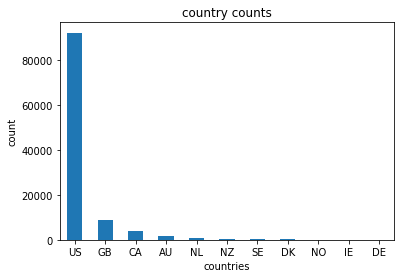

In [ ]:
plt.xlabel("countries")
plt.ylabel("count")
plt.title("country counts")
vc=train['country'].value_counts()
vc.plot.bar(rot=0)

In [ ]:
#more than 80% of the projects are made IN US 

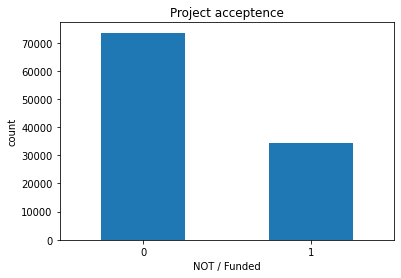

In [ ]:
plt.xlabel("NOT / Funded")
plt.ylabel("count")
plt.title("Project acceptence")
vc=train['final_status'].value_counts()
vc.plot.bar(rot=0)

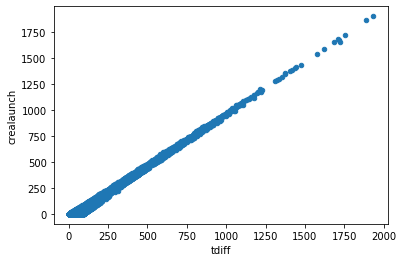

In [ ]:
train.plot.scatter(x="tdiff",y="crealaunch")

In [ ]:
#the higher tdifference gets, the higher crealaunch gets as well. 

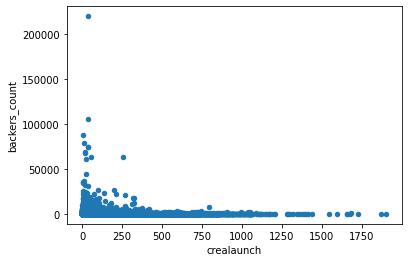

In [ ]:
train.plot.scatter(x='crealaunch',y='backers_count')

In [ ]:
#when the difference between creating the project and launching it is between 0 and 1200, it's more likely that the backers count is less than 40000.

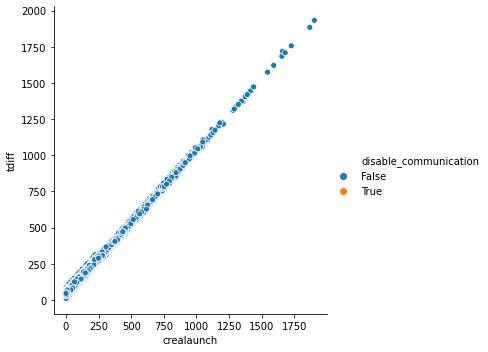

In [ ]:
sns.relplot(x='crealaunch',y='tdiff',hue='disable_communication',data=train)

In [ ]:
#most of the project haven't disabled communication option which allow them to get donated by people in case they needed help during the project 

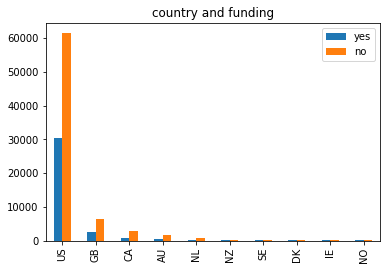

In [ ]:
j_df=pd.DataFrame()
j_df['yes'] = train[train['final_status'] == 1]['country'].value_counts()
j_df['no'] = train[train['final_status'] == 0]['country'].value_counts()

j_df.plot.bar(title = 'country and funding')

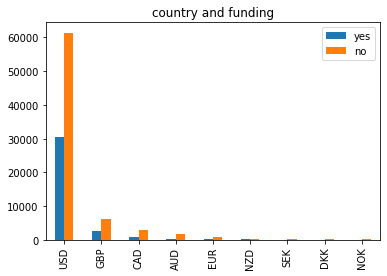

In [ ]:
j_df=pd.DataFrame()
j_df['yes'] = train[train['final_status'] == 1]['currency'].value_counts()
j_df['no'] = train[train['final_status'] == 0]['currency'].value_counts()

j_df.plot.bar(title = 'country and funding')

In [ ]:
train.drop('project_id',axis=1,inplace=True)

In [ ]:
train

,name,name_words,desc,goal,keywords,disable_communication,country,currency,deadline,tdiff,state_changed_at,year_launched,created_at,month_launched,launched_at,crealaunch,statelaunch,backers_count,final_status
0,drawing for dollars,3,I like drawing pictures. and then i color them...,20.0,drawing-for-dollars,False,US,USD,2009-05-03,9,2009-05-03,2009,2009-04-24,4,2009-04-24,0,9,3,1
1,sponsor dereck blackburn (lostwars) artist in ...,10,"I, Dereck Blackburn will be taking upon an inc...",300.0,sponsor-dereck-blackburn-lostwars-artist-in-re...,False,US,USD,2009-05-15,17,2009-05-16,2009,2009-04-28,4,2009-04-29,1,17,2,0
2,mr. squiggles,2,So I saw darkpony's successfully funded drawin...,30.0,mr-squiggles,False,US,USD,2009-05-22,10,2009-05-22,2009,2009-05-12,5,2009-05-12,0,10,0,0
3,help me write my second novel.,6,Do your part to help out starving artists and ...,500.0,help-me-write-my-second-novel,False,US,USD,2009-05-29,30,2009-05-29,2009,2009-04-29,4,2009-04-29,0,30,18,1
4,support casting my sculpture in bronze,6,"I'm nearing completion on a sculpture, current...",2000.0,support-casting-my-sculpture-in-bronze,False,US,USD,2009-05-31,30,2009-05-31,2009,2009-05-01,5,2009-05-01,0,30,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108124,custom wearable art,3,Sacred geometry art and custom clothing. Embro...,2000.0,custom-wearable-art,False,US,USD,2015-05-31,43,2015-05-31,2015,2015-04-18,5,2015-05-01,13,30,3,0
108125,painted modern wall art mid-century! $100 for...,8,I want to create pieces very similar to this o...,15000.0,zacharys-art-project,False,US,USD,2015-05-31,55,2015-05-31,2015,2015-04-06,4,2015-04-06,0,55,1,0
108126,creating high quality art prints from the arti...,9,I am seeking to produce prints to promote my r...,320.0,creating-high-quality-art-prints-from-the-arti...,False,US,USD,2015-05-31,31,2015-05-31,2015,2015-04-30,5,2015-05-01,1,30,11,1
108127,back to basics,3,A self sustaining homestead with organic produ...,35000.0,back-to-basics-2,False,US,USD,2015-05-31,35,2015-05-31,2015,2015-04-26,4,2015-04-30,4,31,0,0


In [ ]:
#There is such thing named influence and good impression, our question is the following, is there an impact given by the name of the work or not? is the more words you have the more you got listened to or not? 
#let's find out


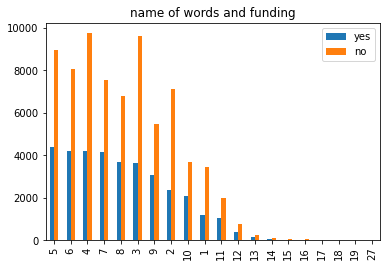

In [ ]:
j_df=pd.DataFrame()
j_df['yes'] = train[train['final_status'] == 1]['name_words'].value_counts()
j_df['no'] = train[train['final_status'] == 0]['name_words'].value_counts()

j_df.plot.bar(title = 'name of words and funding')

In [ ]:
#it seems like it's the other way around, the more words you have less chance to get accepted or funded

In [ ]:
#what about the goal set? is it a very informative character? 
#first we need to range it. 
goals_dic={}
for i in train['goal']:
  if i<1000: 
    goals_dic[i]='<1000'
  elif i<10000:
    goals_dic[i]='<10000'
  elif i<100000:
    goals_dic[i]='<100000'
  else:
    goals_dic[i]='>100000'

In [ ]:
train2['goal']=train['goal'].map(goals_dic)

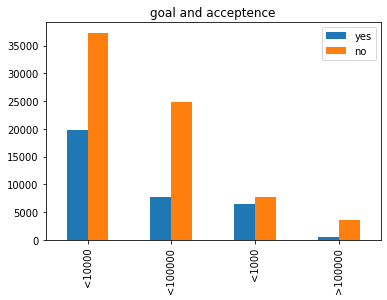

In [ ]:
j_df=pd.DataFrame()
j_df['yes'] = train2[train2['final_status'] == 1]['goal'].value_counts()
j_df['no'] = train2[train2['final_status'] == 0]['goal'].value_counts()

j_df.plot.bar(title = 'goal and acceptence')

In [ ]:
#about 40% of those who choose a goal <1000 got accepted which is the best rate for success, so starting a simple idea with a simple goais better as it seems

In [ ]:
train['crealaunch'].value_counts()[train['crealaunch'].value_counts()>2000]

0     9422
1     8080
2     6529
3     5796
4     4823
5     4345
6     3952
7     3606
8     3122
9     2533
10    2288
11    2033
12    2020
13    2002
Name: crealaunch, dtype: int64

In [ ]:
train['final_status'][train['crealaunch']==4].value_counts()

0    3429
1    1394
Name: final_status, dtype: int64

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


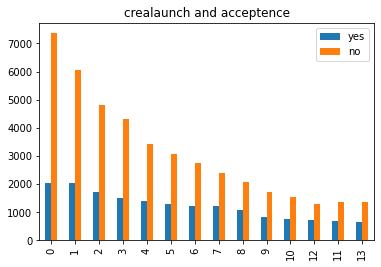

In [ ]:
j_df=pd.DataFrame()
j_df['yes'] = train[train2['final_status'] == 1]['crealaunch'].value_counts()[train['crealaunch'].value_counts()>2000]
j_df['no'] = train[train2['final_status'] == 0]['crealaunch'].value_counts()[train['crealaunch'].value_counts()>2000]

j_df.plot.bar(title = 'crealaunch and acceptence')

In [ ]:
#the more days you have from creation date to the launching date, the more chance you got to get accepted and funded as it is shown.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


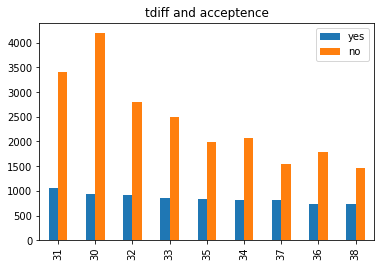

In [ ]:
j_df=pd.DataFrame()
j_df['yes'] = train[train2['final_status'] == 1]['tdiff'].value_counts()[train['tdiff'].value_counts()>2000]
j_df['no'] = train[train2['final_status'] == 0]['tdiff'].value_counts()[train['tdiff'].value_counts()>2000]

j_df.plot.bar(title = 'tdiff and acceptence')

In [ ]:
#the possibility of getting accepted reaches the highest value when it's in 37 days, and reaches the least value when it is in 30 days
#let's find out the crealaunch of these two values?

In [ ]:
train['crealaunch'][train['tdiff']==37].value_counts()

7     1540
6      117
2       97
5       78
4       59
8       48
1       46
3       40
12      38
16      38
0       38
9       34
22      21
14      20
15      18
17      18
11      17
10      17
13      12
23      11
18       9
21       8
19       6
20       4
25       2
27       2
34       1
29       1
31       1
Name: crealaunch, dtype: int64

In [ ]:
#7 is the most frequent value for those who have tdiff=37, and what we found is amazing 7 is the best value for the crealaunch to get accepted.

In [ ]:
train.tail()

,name,name_words,desc,goal,keywords,disable_communication,country,currency,deadline,tdiff,state_changed_at,year_launched,created_at,month_launched,launched_at,crealaunch,statelaunch,backers_count,final_status
108124,custom wearable art,3,Sacred geometry art and custom clothing. Embro...,2000.0,custom-wearable-art,False,US,USD,2015-05-31,43,2015-05-31,2015,2015-04-18,5,2015-05-01,13,30,3,0
108125,painted modern wall art mid-century! $100 for...,8,I want to create pieces very similar to this o...,15000.0,zacharys-art-project,False,US,USD,2015-05-31,55,2015-05-31,2015,2015-04-06,4,2015-04-06,0,55,1,0
108126,creating high quality art prints from the arti...,9,I am seeking to produce prints to promote my r...,320.0,creating-high-quality-art-prints-from-the-arti...,False,US,USD,2015-05-31,31,2015-05-31,2015,2015-04-30,5,2015-05-01,1,30,11,1
108127,back to basics,3,A self sustaining homestead with organic produ...,35000.0,back-to-basics-2,False,US,USD,2015-05-31,35,2015-05-31,2015,2015-04-26,4,2015-04-30,4,31,0,0
108128,"happy olive, mediterranean wraps",4,"Mediterranean Wraps, done right!",25000.0,happy-olive-mediterranean-wraps,False,US,USD,2015-05-31,45,2015-05-31,2015,2015-04-16,4,2015-04-16,0,45,1,0


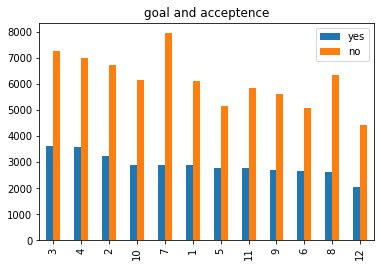

In [ ]:
j_df=pd.DataFrame()
j_df['yes'] = train[train['final_status'] == 1]['month_launched'].value_counts()
j_df['no'] = train[train['final_status'] == 0]['month_launched'].value_counts()

j_df.plot.bar(title = 'month and acceptence')

In [ ]:
# as we can see the possiblity is higher in the 5th month 'may' and 'june', and drops a lot in the 7th month

In [ ]:
train['tdiff'][train['month_launched']==5].value_counts()

32     249
31     236
33     227
35     212
34     209
      ... 
685      1
645      1
641      1
629      1
4        1
Name: tdiff, Length: 432, dtype: int64

In [ ]:
#as we can see those who finally launched their product in the 5th month have already done with their work before at least 200 days.

In [ ]:
train['goal'][train['month_launched']==5].value_counts()

5000.0      611
10000.0     475
1000.0      371
3000.0      364
2000.0      352
           ... 
850000.0      1
6672.0        1
8889.0        1
2033.0        1
140.0         1
Name: goal, Length: 636, dtype: int64

In [ ]:
#the goal of those who have launched their project in the 5th month is at least 1000 dollars.

In [ ]:
#ok now does the goal get higher in a higher year? 

In [ ]:
train.drop(['launched_at','state_changed_at','created_at','deadline','desc','name','keywords','country','currency'],axis=1,inplace=True)

In [ ]:
from keras.utils import to_categorical
train['disable_communication']=to_categorical(train['disable_communication'],2)

In [ ]:
from sklearn.linear_model import LogisticRegression
logisticRegr=LogisticRegression()
logisticRegr.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
train['name_words']=train['name_words']/max(train['name_words'])
train['goal']=train['goal']/max(train['goal'])
train['disable_communication']=train['disable_communication']/max(train['disable_communication'])
train['tdiff']=train['tdiff']/max(train['tdiff'])
train['year_launched']=train['year_launched']/max(train['year_launched'])
train['month_launched']=train['month_launched']/max(train['month_launched'])
train['crealaunch']=train['crealaunch']/max(train['crealaunch'])
train['statelaunch']=train['statelaunch']/max(train['statelaunch'])
train['backers_count']=train['backers_count']/max(train['backers_count'])


In [ ]:
train.head()

,name_words,goal,disable_communication,tdiff,year_launched,month_launched,crealaunch,statelaunch,backers_count,final_status
0,0.111111,2.000000e-07,1.0,0.004656,0.997022,0.333333,0.000000,0.025424,0.000014,1
1,0.370370,3.000000e-06,1.0,0.008795,0.997022,0.333333,0.000525,0.048023,0.000009,0
2,0.074074,3.000000e-07,1.0,0.005173,0.997022,0.416667,0.000000,0.028249,0.000000,0
3,0.222222,5.000000e-06,1.0,0.015520,0.997022,0.333333,0.000000,0.084746,0.000082,1
4,0.222222,2.000000e-05,1.0,0.015520,0.997022,0.416667,0.000000,0.084746,0.000005,0


In [ ]:
X=train.iloc[:,:-1]
Y=train.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
logisticRegr.predict(x_test[0:10])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
score=logisticRegr.score(x_test,y_test)
print(score)

0.6773954864964854


In [ ]:
from sklearn.ensemble import RandomForestClassifier
lf = RandomForestClassifier(n_estimators=300,max_depth=2, random_state=0)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.6762856085830559


In [ ]:
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import Dropout

In [ ]:
model=Sequential([Dense(128,input_dim=9,activation='relu'),
                 Dense(128,activation='relu'),
                 Dense(128,activation='relu'),
                 Dropout(0.5),
                 Dense(128,activation='relu'),
                   Dropout(0.5),
                  Dense(2,activation='sigmoid')])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=150, batch_size=64,validation_data=(x_test,y_test))

Epoch 1/150
1352/1352 [==============================] - 4s 3ms/step - loss: 0.6242 - accuracy: 0.6811 - val_loss: 0.6204 - val_accuracy: 0.6762
Epoch 2/150
1352/1352 [==============================] - 4s 3ms/step - loss: 0.6167 - accuracy: 0.6815 - val_loss: 0.6083 - val_accuracy: 0.6825
Epoch 3/150
1352/1352 [==============================] - 4s 3ms/step - loss: 0.5908 - accuracy: 0.7063 - val_loss: 0.5594 - val_accuracy: 0.7484
Epoch 4/150
1352/1352 [==============================] - 4s 3ms/step - loss: 0.5240 - accuracy: 0.7541 - val_loss: 0.5609 - val_accuracy: 0.7494
Epoch 5/150
1352/1352 [==============================] - 4s 3ms/step - loss: 0.4589 - accuracy: 0.7861 - val_loss: 0.4119 - val_accuracy: 0.7901
Epoch 6/150
1352/1352 [==============================] - 5s 4ms/step - loss: 0.4271 - accuracy: 0.7989 - val_loss: 0.3975 - val_accuracy: 0.7998
Epoch 7/150
1352/1352 [==============================] - 4s 3ms/step - loss: 0.4224 - accuracy: 0.7997 - val_loss: 0.4558 - val_ac

In [ ]:
x_train.shape

(86495, 9)

In [ ]:
y_train.shape

(86495,)

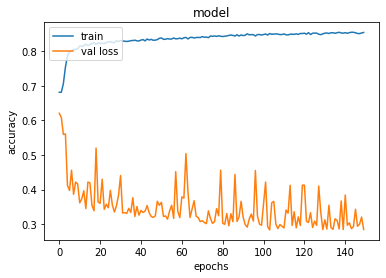

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_loss'])
plt.title('model')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','val loss'],loc='upper left')
plt.show()